In [1]:
#requirements
#pip3 install pandas numpy prophet

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../data/datasets/onemonthprocessed_nodeload15.csv')
print(df.head(5))
print(df.tail(5))
print(df.describe())
print(df.dtypes)
print(len(df['y']))

                    ds     y
0  13/05/2024 00:00:00  6.53
1  13/05/2024 00:00:05  6.53
2  13/05/2024 00:00:10  6.53
3  13/05/2024 00:00:15  6.52
4  13/05/2024 00:00:20  6.52
                         ds    y
532706  13/06/2024 23:59:40  2.6
532707  13/06/2024 23:59:45  2.6
532708  13/06/2024 23:59:50  2.6
532709  13/06/2024 23:59:55  2.6
532710  14/06/2024 00:00:00  2.6
                   y
count  532711.000000
mean        4.380956
std         2.186642
min         1.090000
25%         2.230000
50%         4.730000
75%         6.060000
max        10.500000
ds     object
y     float64
dtype: object
532711


In [4]:
from prophet import Prophet
df['cap']=100
m = Prophet(growth='logistic')
m.fit(df) 

#future = m.make_future_dataframe(periods=1, freq='H')

/Users/mayurshamkuwar/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:1133: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  self.history_dates = pd.to_datetime(pd.Series(history['ds'].unique(), name='ds')).sort_values()
/Users/mayurshamkuwar/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:287: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['ds'] = pd.to_datetime(df['ds'])
14:39:37 - cmdstanpy - INFO - Chain [1] start processing
14:45:24 - cmdstanpy - INFO - Chain [1] done processing


In [5]:
future = m.make_future_dataframe(periods=30, freq='D')

/Users/mayurshamkuwar/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/mayurshamkuwar/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


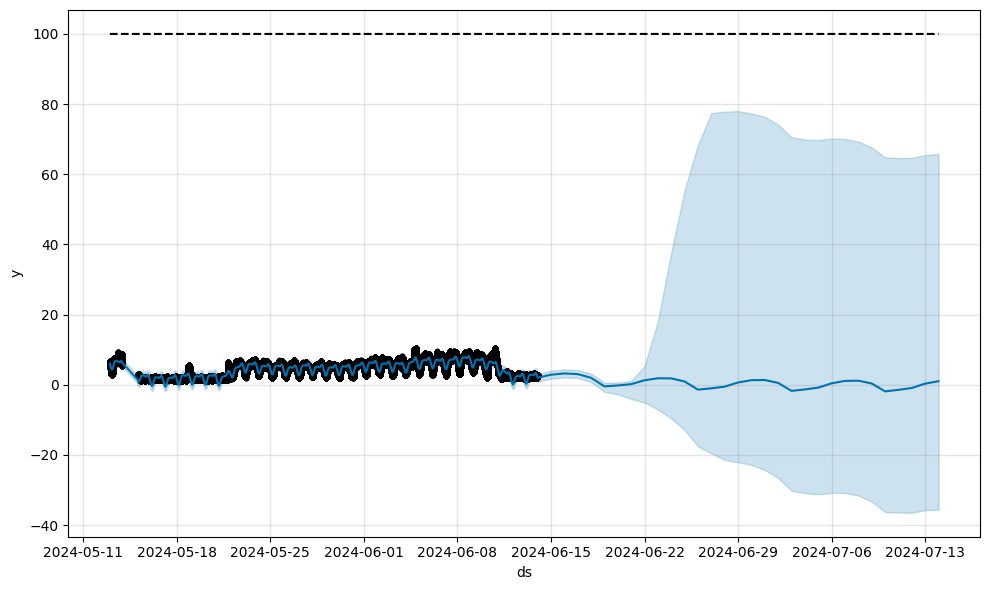

In [6]:
future['cap'] = 100

fcst = m.predict(future)
fig = m.plot(fcst)

In [7]:
predicted_results = fcst[['ds', 'yhat', 'yhat_lower','yhat_upper', 'trend','trend_lower', 'trend_upper']]
print(predicted_results.head())

                   ds      yhat  yhat_lower  yhat_upper     trend  \
0 2024-05-13 00:00:00  6.013967    4.886905    7.089470  4.962351   
1 2024-05-13 00:00:05  6.013088    4.876645    7.146735  4.962341   
2 2024-05-13 00:00:10  6.012209    4.861679    7.121235  4.962330   
3 2024-05-13 00:00:15  6.011330    4.971647    7.116037  4.962320   
4 2024-05-13 00:00:20  6.010451    4.957824    7.242743  4.962310   

   trend_lower  trend_upper  
0     4.962351     4.962351  
1     4.962341     4.962341  
2     4.962330     4.962330  
3     4.962320     4.962320  
4     4.962310     4.962310  


In [8]:
predicted_results.to_csv('../data/predicted/fbproph_month_predicted_nodeload15.csv', index=False)

/Users/mayurshamkuwar/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/mayurshamkuwar/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/Users/mayurshamkuwar/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python d

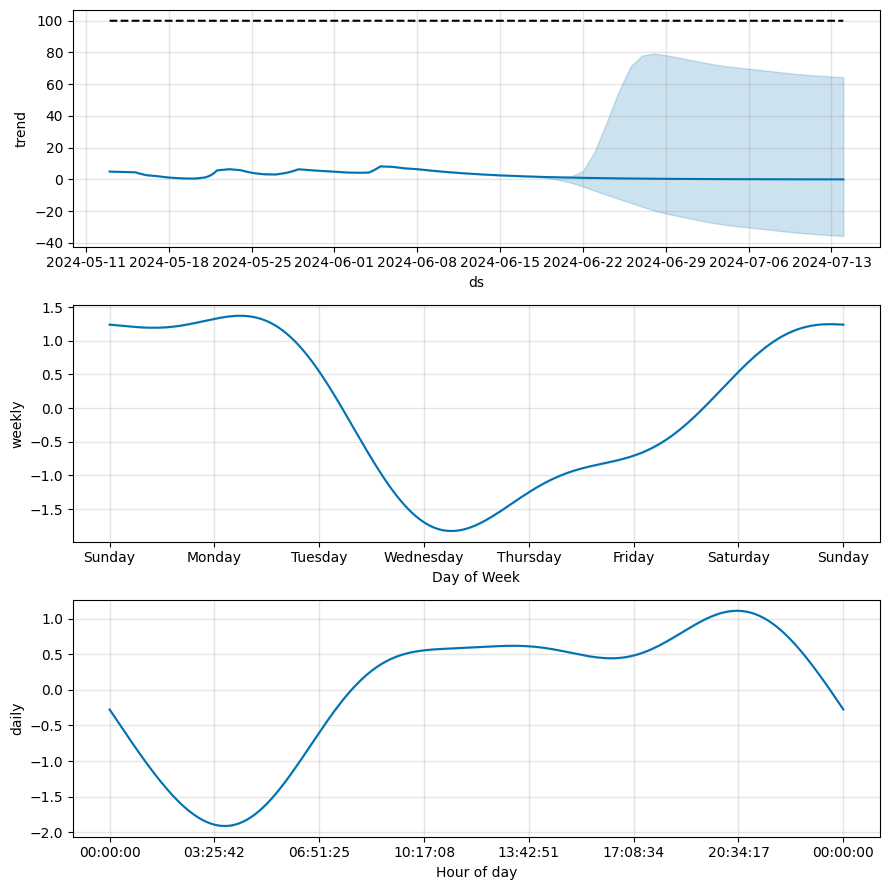

In [9]:
fig1 = m.plot_components(fcst)

In [10]:
print(predicted_results.describe())

                                  ds           yhat     yhat_lower  \
count                         532712  532712.000000  532712.000000   
mean   2024-05-29 13:06:06.424325376       4.382889       3.264707   
min              2024-05-13 00:00:00      -1.883464     -36.489019   
25%    2024-05-21 20:50:43.750000128       2.710087       1.595872   
50%       2024-05-29 13:53:32.500000       4.859994       3.735524   
75%    2024-06-06 06:58:26.249999872       5.962159       4.845571   
max              2024-07-14 00:00:00       8.174217       7.188060   
std                              NaN       1.999525       2.009754   

          yhat_upper          trend    trend_lower    trend_upper  
count  532712.000000  532712.000000  532712.000000  532712.000000  
mean        5.502414       4.425036       4.423952       4.427771  
min         0.461573       0.050009     -35.606353       0.537222  
25%         3.830695       3.278566       3.278566       3.278713  
50%         5.968953       4.

In [11]:
print(predicted_results.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532712 entries, 0 to 532711
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   ds           532712 non-null  datetime64[ns]
 1   yhat         532712 non-null  float64       
 2   yhat_lower   532712 non-null  float64       
 3   yhat_upper   532712 non-null  float64       
 4   trend        532712 non-null  float64       
 5   trend_lower  532712 non-null  float64       
 6   trend_upper  532712 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 28.5 MB
None
